In [23]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Data

In [24]:
# Load mpg data from sns
cars = sns.load_dataset('mpg')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 1-Matplotlib

## 2-Seaborn

In [25]:
import seaborn  as sns
# Set the standard theme
sns.set_theme() 

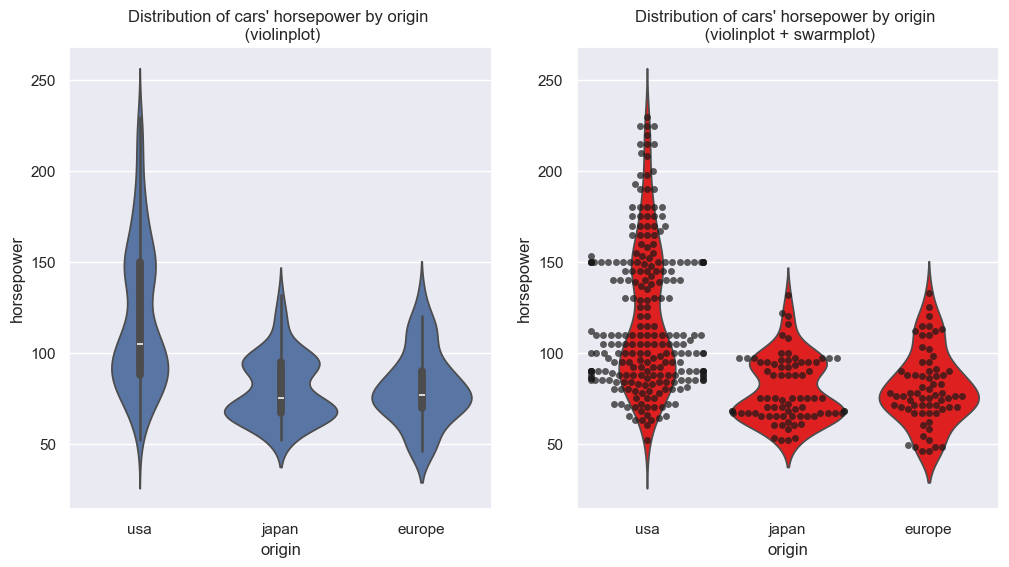

In [32]:
# Violin and swarm plots
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.violinplot(x="origin", y="horsepower", data=cars)
plt.title("Distribution of cars' horsepower by origin \n (violinplot)")
plt.subplot(1,2,2)
sns.violinplot(x="origin", y="horsepower", data=cars, inner=None, color="red")
sns.swarmplot(x="origin", y="horsepower", data=cars, color="k", alpha=0.7)
plt.title("Distribution of cars' horsepower by origin \n (violinplot + swarmplot)")
plt.show()

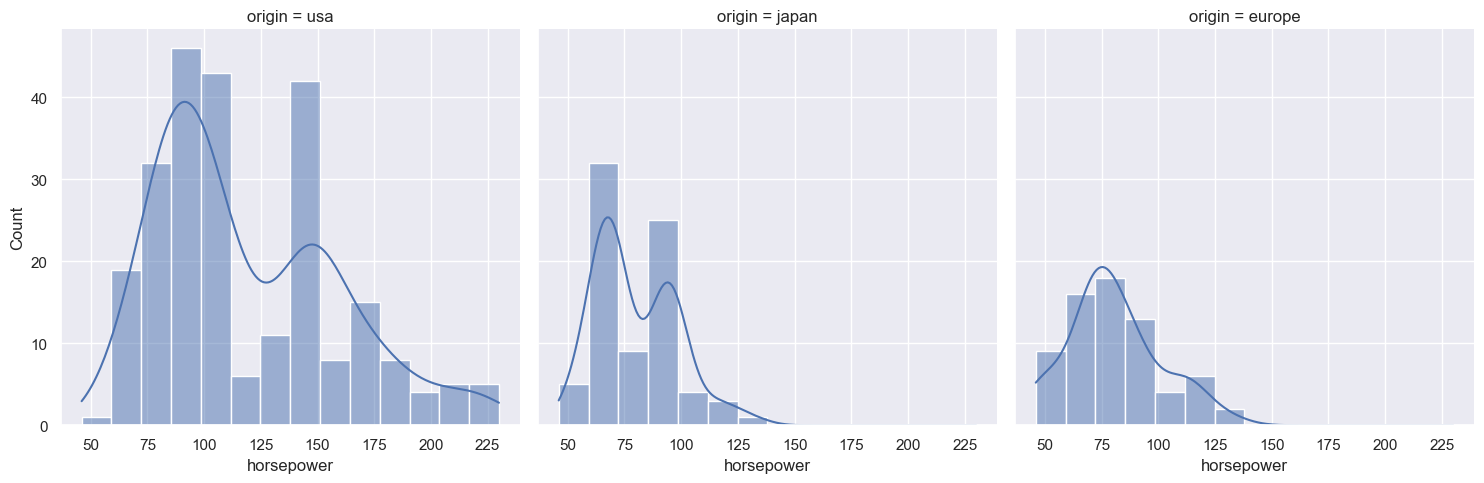

In [33]:
# Histograms with density estimate plots
sns.displot(data=cars, x="horsepower", col="origin", kde=True)
plt.show()

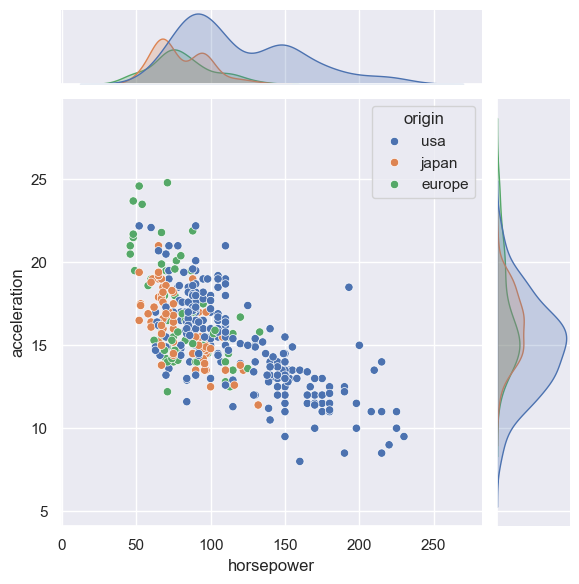

In [13]:
# Joint distribution scatter plot with density estimate plots
sns.jointplot(data=cars, x="horsepower", y="acceleration", hue="origin")


## 3-GGplot